# Project Title: "Job Insights" Analyzing Employment Trends and Skills in Data Science


### Candidate Name: Mayur Kumar Sharma
### Batch: DW-32
### Mail ID: mayur4everyone@gmail.com
### Mob: 9649552001
### IIT-M incubated GUVI Geek Networks

In [40]:
# Importing requied libraries

import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
from nltk.corpus import stopwords

In [2]:
# Read the dataset into a pandas DataFrame
data = pd.read_csv("uncleaned_ds_jobs.csv")

In [3]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [15]:
data.dtypes

index                 int64
Job Title            object
Salary Estimate      object
Job Description      object
Company Name         object
Location             object
Headquarters         object
Size                 object
Founded               int64
Type of ownership    object
Industry             object
Sector               object
Revenue              object
Competitors          object
dtype: object

## 1. To identify the top five industries with the highest number of job openings

In [16]:
data['Industry']

0                         Insurance Carriers
1                     Research & Development
2                                 Consulting
3      Electrical & Electronic Manufacturing
4                    Advertising & Marketing
                       ...                  
667                  Advertising & Marketing
668                                       -1
669                                       -1
670                  Advertising & Marketing
671                                Wholesale
Name: Industry, Length: 672, dtype: object

In [17]:
# Replace "-1" with "XYZ_Unknown" in the 'Industry' column
data['Industry'] = data['Industry'].replace('-1', 'XYZ_Unknown')

In [18]:
# Group the data by industry and count the number of job openings in each industry
industry_counts = data.groupby('Industry')['Job Title'].count().reset_index()

In [20]:
# Sort the industries based on the job opening counts in descending order
sorted_industries = industry_counts.sort_values('Job Title', ascending=False)

In [21]:
# Take the top five industries with the highest number of job openings
top_five_industries = sorted_industries.head(5)

In [22]:
# Print the top five industries with their job opening counts
print(top_five_industries[['Industry', 'Job Title']])

                        Industry  Job Title
57                   XYZ_Unknown         71
5      Biotech & Pharmaceuticals         66
27                   IT Services         61
9   Computer Hardware & Software         57
2            Aerospace & Defense         46


## 2. To analyze the distribution of job opportunities based on geographic regions

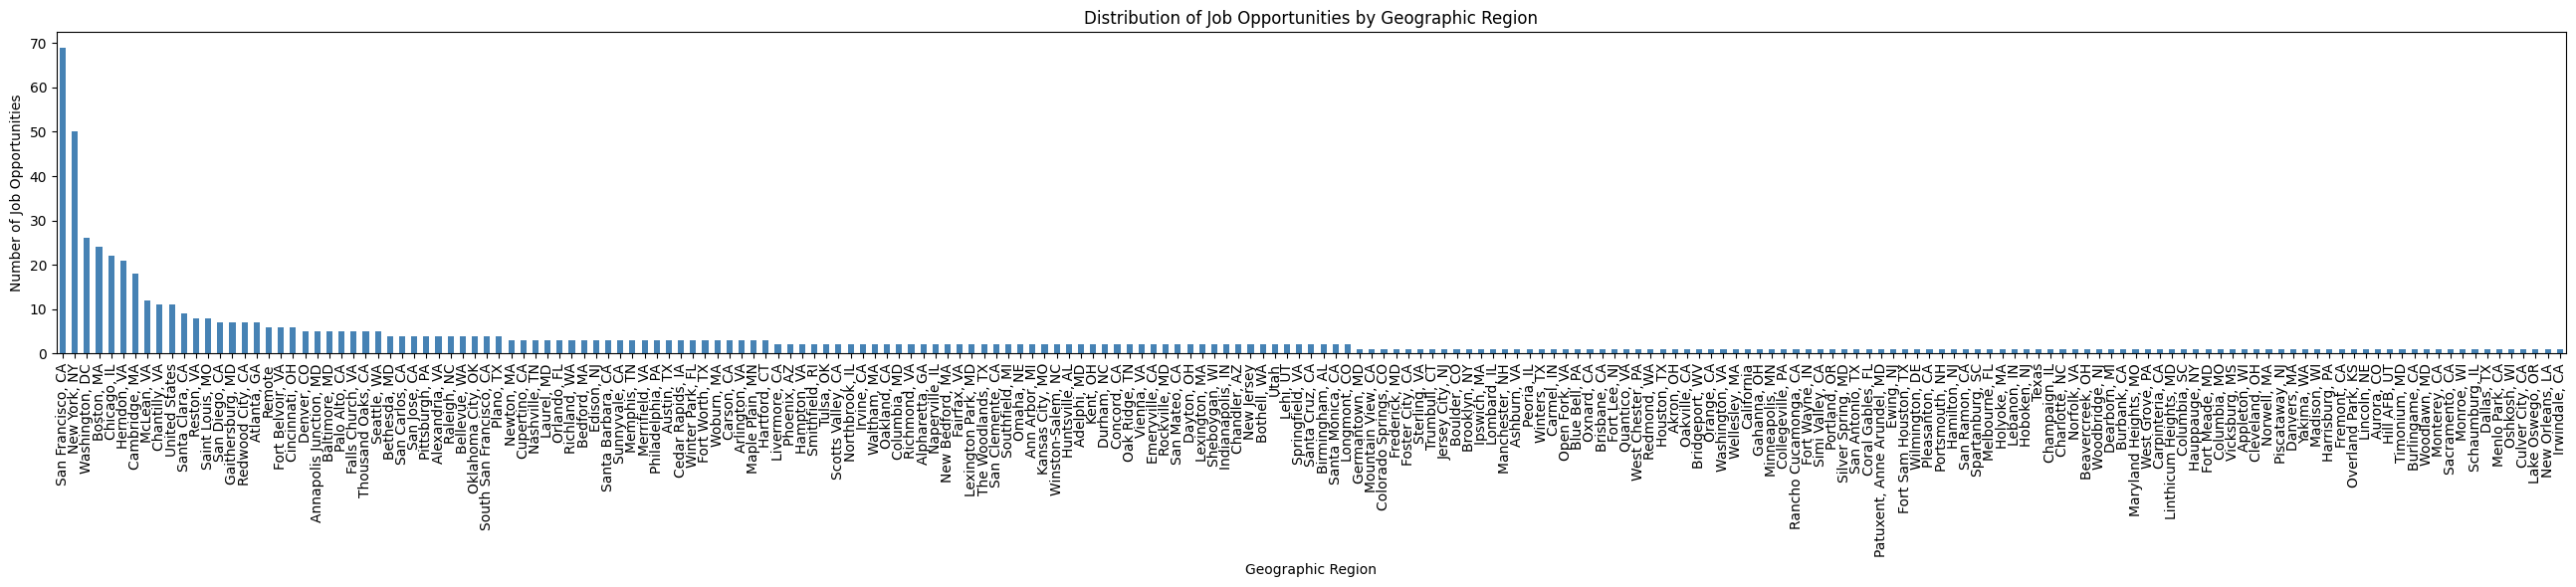

In [23]:
locations = data['Location']
region_counts = locations.value_counts()

plt.figure(figsize=(26, 6))
region_counts.plot(kind='bar', color='steelblue')
plt.xlabel('Geographic Region')
plt.ylabel('Number of Job Opportunities')
plt.title('Distribution of Job Opportunities by Geographic Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3. To determine the min and max average salary range for different job positions across the industries and how the salary changes from region to region

In [24]:
data['Salary Estimate']

0      $137K-$171K (Glassdoor est.)
1      $137K-$171K (Glassdoor est.)
2      $137K-$171K (Glassdoor est.)
3      $137K-$171K (Glassdoor est.)
4      $137K-$171K (Glassdoor est.)
                   ...             
667    $105K-$167K (Glassdoor est.)
668    $105K-$167K (Glassdoor est.)
669    $105K-$167K (Glassdoor est.)
670    $105K-$167K (Glassdoor est.)
671    $105K-$167K (Glassdoor est.)
Name: Salary Estimate, Length: 672, dtype: object

In [25]:
# Convert the column to string type
data['Salary Estimate'] = data['Salary Estimate'].astype(str)

In [26]:
# Extract the numeric values from the column
data['Salary Estimate'] = data['Salary Estimate'].str.extract(r'(\d+)').astype(float)

In [27]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,137.0,Description\n\nThe Senior Data Scientist is re...,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,137.0,"Secure our Nation, Ignite your Future\n\nJoin ...",ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,137.0,Overview\n\n\nAnalysis Group is one of the lar...,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,137.0,JOB DESCRIPTION:\n\nDo you have a passion for ...,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,137.0,Data Scientist\nAffinity Solutions / Marketing...,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [28]:
# Calculate the average salary range for each job position
average_salary = data.groupby('Job Title')['Salary Estimate'].mean()

In [29]:
average_salary

Job Title
(Sr.) Data Scientist -                                      83.000000
AI Data Scientist                                           90.000000
AI Ops Data Scientist                                       94.333333
AI/ML - Machine Learning Scientist, Siri Understanding      92.000000
Analytics - Business Assurance Data Analyst                108.333333
                                                              ...    
Statistical Scientist                                       56.000000
Tableau Data Engineer 20-0117                               90.000000
VP, Data Science                                            55.000000
Vice President, Biometrics and Clinical Data Management    138.000000
Weapons and Sensors Engineer/Scientist                     124.000000
Name: Salary Estimate, Length: 172, dtype: float64

In [30]:
# Calculate the minimum and maximum average salary across industries
min_salary = average_salary.min()
max_salary = average_salary.max()

print(f"Minimum average salary: {min_salary}")
print(f"Maximum average salary: {max_salary}")

Minimum average salary: 55.0
Maximum average salary: 212.0


In [34]:
# Calculate the average salary range for each region
average_salary_region = data.groupby('Location')['Salary Estimate'].mean()

print("\nAverage salary by region (alphabatic order):\n")
for region, salary in average_salary_region.items():
    print(f"{region}: {salary}")


Average salary by region (alphabatic order):

Adelphi, MD: 108.5
Akron, OH: 75.0
Alexandria, VA: 85.0
Alpharetta, GA: 69.0
Ann Arbor, MI: 134.5
Annapolis Junction, MD: 82.2
Appleton, WI: 137.0
Arlington, VA: 86.33333333333333
Ashburn, VA: 79.0
Atlanta, GA: 91.28571428571429
Aurora, CO: 99.0
Austin, TX: 115.0
Baltimore, MD: 84.8
Beavercreek, OH: 71.0
Bedford, MA: 118.0
Bellevue, WA: 83.25
Bethesda, MD: 79.0
Birmingham, AL: 95.5
Blue Bell, PA: 101.0
Boston, MA: 97.75
Bothell, WA: 83.0
Boulder, CO: 69.0
Bridgeport, WV: 87.0
Brisbane, CA: 79.0
Brooklyn, NY: 124.0
Burbank, CA: 124.0
Burlingame, CA: 99.0
California: 80.0
Cambridge, MA: 97.94444444444444
Carmel, IN: 79.0
Carpinteria, CA: 90.0
Carson, CA: 75.66666666666667
Cedar Rapids, IA: 108.33333333333333
Champaign, IL: 71.0
Chandler, AZ: 100.0
Chantilly, VA: 100.0
Charlotte, NC: 71.0
Chicago, IL: 98.13636363636364
Cincinnati, OH: 91.5
Cleveland, OH: 90.0
Collegeville, PA: 80.0
Colorado Springs, CO: 31.0
Columbia, MD: 123.0
Columbia, MO: 

## 4. To determine the most in-demand skills across industries and highlight emerging skill trends

In [38]:
data['Job Description'][3]

"JOB DESCRIPTION:\n\nDo you have a passion for Data and Machine Learning? Do you dream of working with customers on their most forward-looking AI initiatives? Does the challenge of developing modern machine learning solutions to solve real-world manufacturing problems exciting to you?\n\nWe develop software for monitoring semiconductor manufacturing process and are looking to leverage the latest technologies to address our customer's needs. You will be part of a team that investigates and builds solutions based all the data available in factories, ranging from time series data, to post manufacturing data, to production logs. You will be working side by side with application developers and customers on real world problems with actual manufacturing data.\n\nJOB FUNCTION:\n\nBasic and applied research in statistical machine learning, deep learning, and data science as well as signal and information processing to advance the state of the art in time series analysis of semiconductor manufac

In [42]:
# Extract the job descriptions
job_descriptions = data['Job Description'].tolist()

#Let's collect the stop words in "english"
stop_words = set(stopwords.words("english"))
stop_words.add(',')
stop_words.add('.')
stop_words.add('}')
stop_words.add('/')
stop_words.add('''"''')
print("Total stop words = ", len(stop_words))

Total stop words =  184


In [83]:
sample_skills = [
    'programming', 'python', 'Ruby', 'C Language', 'C++', 'MongoDB', 'MySql', 'java', 'Data analysis', 'sql',
    'machine learning', 'AWS', 'PowerBI', 'Tableau', 'communication', 'teamwork', 'problem-solving',
    'critical thinking', 'leadership', 'project management', 'cloud computing', 'GCP', 'Azure',
    'cybersecurity', 'web development', 'mobile app development', 'data visualization',
    'networking', 'agile methodologies', 'artificial intelligence', 'big data',
    'business intelligence', 'customer service', 'digital marketing', 'frontend development',
    'backend development', 'UI/UX design', 'statistical analysis', 'research', 'presentation skills',
    'time management', 'sales', 'finance', 'technical writing', 'quality assurance',
    'software testing', 'database management', 'network administration', 'Linux', 'Windows',
    'problem management', 'troubleshooting', 'continuous integration', 'DevOps', 'version control',
    'data mining', 'cloud architecture', 'natural language processing', 'IoT', 'Analytics',
    'system administration', 'data warehousing', 'predictive modeling', 'algorithm design',
    'data cleansing', 'data governance', 'data engineering', 'data modeling', 'pytorch', 'tensorflow'
]


In [84]:
# Create a Counter to keep track of skill occurrences
skills_counter = Counter()

# Iterate over the 'Job Description' column in 'data'
for job_description in data['Job Description']:
    # Convert the job description to lowercase for case-insensitive matching
    job_description = job_description.lower()
    
    # Iterate over the matched_skills list
    for skill in sample_skills:
        
        # Check if the skill is present in the job description
        if skill.lower() in job_description:
            
            # Check if the skill is not in the stop_words list
            if job_description.lower() not in stop_words:
                
                # Update the skills_counter with the skill occurrence
                skills_counter[skill] += 1
                #skills_counter.update()

# Determine the most common skills and their frequencies
top_skills = skills_counter.most_common(10)

In [85]:
top_skills

[('python', 490),
 ('machine learning', 415),
 ('Analytics', 361),
 ('sql', 355),
 ('communication', 329),
 ('research', 305),
 ('programming', 249),
 ('Data analysis', 178),
 ('AWS', 174),
 ('java', 166)]

In [76]:
# Print the results
print("Most in-demand skills across industries:\n")
for skill, frequency in top_skills:
    print(f"{skill}: {frequency} occurrences")

Most in-demand skills across industries:

python: 490 occurrences
machine learning: 415 occurrences
Analytics: 361 occurrences
sql: 355 occurrences
communication: 329 occurrences
research: 305 occurrences
programming: 249 occurrences
Data analysis: 178 occurrences
AWS: 174 occurrences
java: 166 occurrences


In [86]:
# Identify emerging skill trends
emerging_skills = [skill for skill, frequency in top_skills if frequency <= 200]

print("\nEmerging skill trends:\n")
for skill in emerging_skills:
    #print(skill)
    print(f"{skill}: {frequency} occurrences")


Emerging skill trends:

Data analysis: 166 occurrences
AWS: 166 occurrences
java: 166 occurrences


## 5. Academic education fosters critical thinking and problem-solving skills. Through research, analysis, and rigorous study, students learn to evaluate information, develop logical reasoning, and apply problem-solving techniques. These skills are valuable in navigating real-life challenges, making informed decisions, and contributing to innovation and progress. So find out academic qualifications preferred by companies and distribution of them.

In [46]:
data['Job Description']

0      Description\n\nThe Senior Data Scientist is re...
1      Secure our Nation, Ignite your Future\n\nJoin ...
2      Overview\n\n\nAnalysis Group is one of the lar...
3      JOB DESCRIPTION:\n\nDo you have a passion for ...
4      Data Scientist\nAffinity Solutions / Marketing...
                             ...                        
667    Summary\n\nWe’re looking for a data scientist ...
668    Job Description\nBecome a thought leader withi...
669    Join a thriving company that is changing the w...
670    100 Remote Opportunity As an AINLP Data Scient...
671    Description\n\nThe Data Scientist will be part...
Name: Job Description, Length: 672, dtype: object

In [64]:
# List of keywords to match
keywords = ['BA', 'BE', 'BSc', 'BTECH', 'BCOMM', 'Bachelor', 'MCA', 'MTECH', 'MBA', 'MSC', 'MCOMM', 'PhD']

# List to store matched qualifications
qualifications = []

# Iterate over the values in 'Job Description' column
for description in data['Job Description']:
    for keyword in keywords:
        if keyword.lower() in description.lower():
            qualifications.append(keyword)

In [65]:
# Calculate the distribution
qualifications_count = pd.Series(qualifications).value_counts()
qualifications_distribution = qualifications_count / qualifications_count.sum() * 100

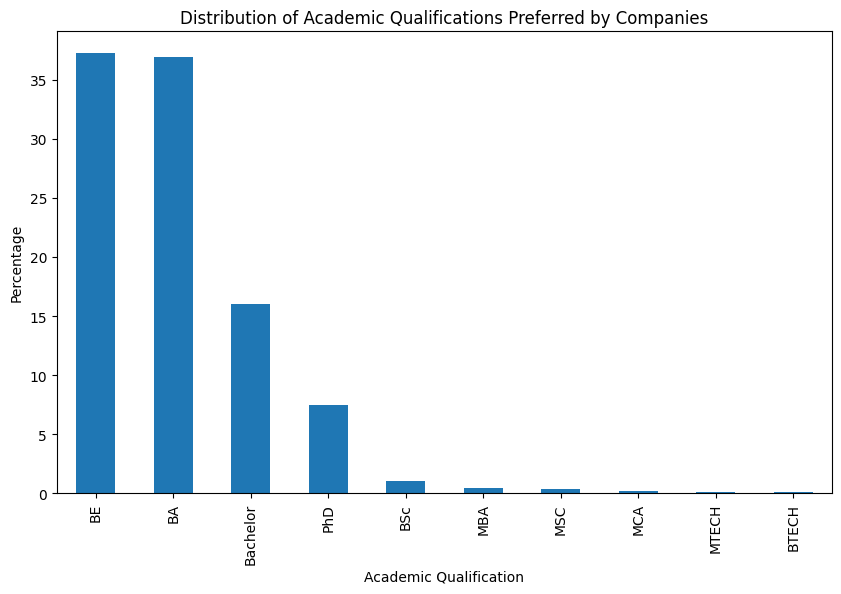

In [66]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
qualifications_distribution.plot(kind='bar')
plt.title('Distribution of Academic Qualifications Preferred by Companies')
plt.xlabel('Academic Qualification')
plt.ylabel('Percentage')
plt.show()

## 6. To provide how a candidate's years of experience in a job role have influenced

In [87]:
# Filter the data for data science job roles
jobs = data[data['Job Title'].str.contains('data scientist|data analyst|data engineer', case=False)]

In [ ]:
# Convert years of experience to numeric values
jobs['Years of Experience'] = jobs['Job Description'].str.extract(r'(\d+\.?\d?)\s?(?:years? of experience)', expand=False).astype(float)


In [89]:
# Filter out rows with missing values in Years of Experience and Salary Estimation
jobs = jobs.dropna(subset=['Years of Experience', 'Salary Estimate'])

In [90]:
# Group the data by years of experience and calculate the average salary estimation
average_salary_by_experience = jobs.groupby('Years of Experience')['Salary Estimate'].mean()

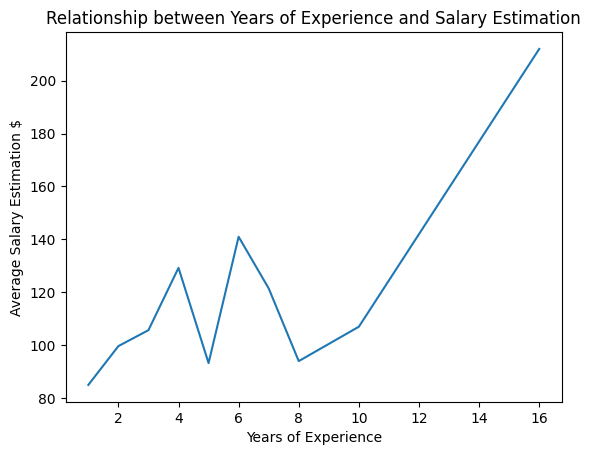

In [92]:
# Plot the results
plt.plot(average_salary_by_experience.index, average_salary_by_experience.values)
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary Estimation $')
plt.title('Relationship between Years of Experience and Salary Estimation')
plt.show()


## 7. To analyze the spread of the various companies ratings

In [93]:
# Define the rating range
min_rating = 1
max_rating = 5

In [94]:
# Calculate the rating scale based on the salary range
min_salary = data['Salary Estimate'].min()
max_salary = data['Salary Estimate'].max()
rating_scale = max_rating - min_rating

In [95]:
# Create the "Rating" column based on the salary range
data['Rating'] = ((data['Salary Estimate'] - min_salary) / (max_salary - min_salary)) * rating_scale + min_rating
data['Rating'] = data['Rating'].round().astype(int)

In [96]:
# Group the data by company and calculate the mean rating for each company
company_ratings = data.groupby('Company Name')['Rating'].mean()

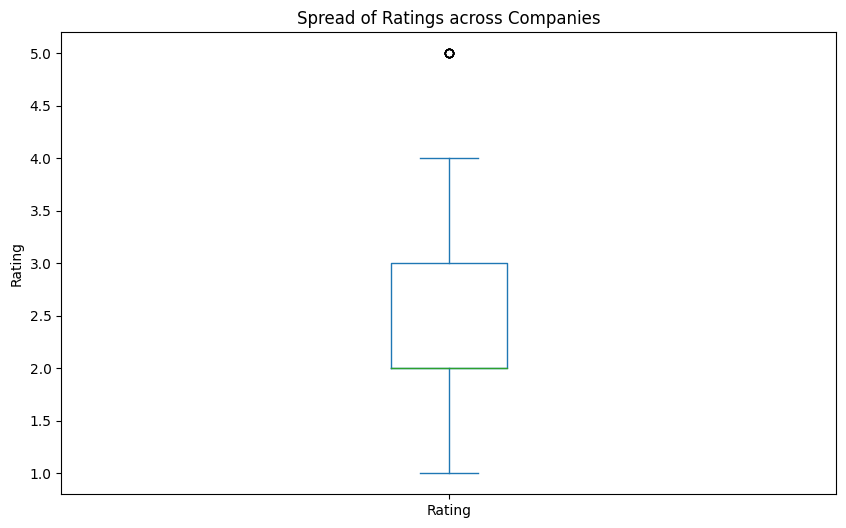

In [97]:
# Plot a boxplot to visualize the spread of ratings across companies
plt.figure(figsize=(10, 6))
company_ratings.plot(kind='box')
plt.ylabel('Rating')
plt.title('Spread of Ratings across Companies')
plt.show()

## 8. To analyze the distribution of the ownership of companies

In [98]:
data['Type of ownership']

0       Nonprofit Organization
1             Company - Public
2      Private Practice / Firm
3             Company - Public
4            Company - Private
                ...           
667          Company - Private
668                         -1
669                         -1
670          Company - Private
671           Company - Public
Name: Type of ownership, Length: 672, dtype: object

In [99]:
# Replace "-1" with "XYZ_Unknown" in the 'Type of ownership' column
data['Type of ownership'] = data['Type of ownership'].replace('-1', 'XYZ_Ownership')

In [100]:
ownership = data["Type of ownership"]
ownership_distribution = ownership.value_counts()

In [101]:
ownership_distribution

Company - Private                 397
Company - Public                  153
Nonprofit Organization             36
Subsidiary or Business Segment     28
XYZ_Ownership                      27
Government                         10
Other Organization                  5
Private Practice / Firm             4
Unknown                             4
College / University                3
Self-employed                       2
Contract                            2
Hospital                            1
Name: Type of ownership, dtype: int64

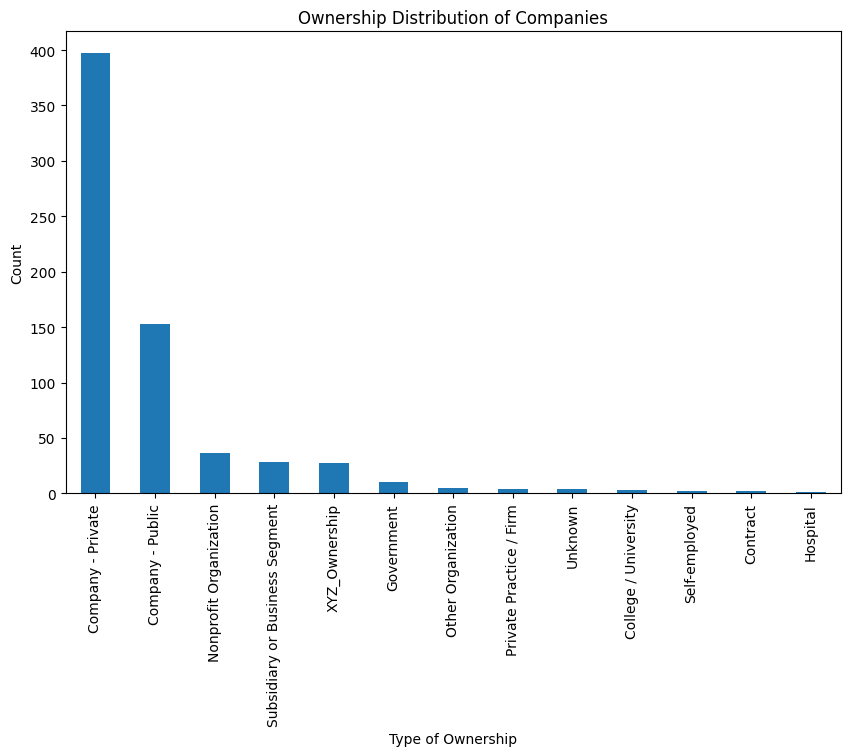

In [102]:
plt.figure(figsize=(10, 6))
ownership_distribution.plot(kind="bar")
plt.title("Ownership Distribution of Companies")
plt.xlabel("Type of Ownership")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


## 9. Revenue is a key indicator of a company's financial performance. It reflects the amount of money generated through the sale of goods or services. Monitoring revenue allows businesses to assess their financial health, track growth or decline, and make informed decisions regarding profitability and sustainability. Task is to identify the max and min revenue spread across the industries.

In [102]:
# Initial values
data['Revenue'].value_counts()

Unknown / Non-Applicable            213
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
-1                                   27
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: Revenue, dtype: int64

In [103]:
# Replace "-1" with "0" in the 'Revenue' column
data['Revenue'] = data['Revenue'].replace('-1', '0')

In [104]:
# Replace "Unknown / Non-Applicable" with "0" in the 'Revenue' column
data['Revenue'] = data['Revenue'].replace('Unknown / Non-Applicable', '0')

In [105]:
# Updated values for scaling
data['Revenue'].value_counts()

0                                   240
$100 to $500 million (USD)           94
$10+ billion (USD)                   63
$2 to $5 billion (USD)               45
$10 to $25 million (USD)             41
$1 to $2 billion (USD)               36
$25 to $50 million (USD)             36
$50 to $100 million (USD)            31
$1 to $5 million (USD)               31
$500 million to $1 billion (USD)     19
$5 to $10 million (USD)              14
Less than $1 million (USD)           14
$5 to $10 billion (USD)               8
Name: Revenue, dtype: int64

In [106]:
# Convert the column to string type
data['Revenue'] = data['Revenue'].astype(str)

In [107]:
# Extract the numeric values from the column
data['Revenue'] = data['Revenue'].str.extract(r'(\d+)').astype(float)

In [108]:
data['Revenue'].value_counts()

0.0      240
10.0     104
100.0     94
1.0       81
2.0       45
25.0      36
50.0      31
5.0       22
500.0     19
Name: Revenue, dtype: int64

In [109]:
# Group the data by the 'Industry' column and calculate max/min revenue
revenue_stats = data.groupby('Industry')['Revenue'].agg(['max', 'min'])

In [110]:
# Calculate the revenue spread for each industry
revenue_stats['spread'] = revenue_stats['max'] - revenue_stats['min']

# Identify the industry with the maximum revenue spread
max_spread_industry = revenue_stats['spread'].idxmax()

# Identify the industry with the minimum revenue spread
min_spread_industry = revenue_stats['spread'].idxmin()

In [113]:
# Print the results
print("Industry with maximum revenue spread:")
print(revenue_stats.loc[max_spread_industry])
print("\n")
print("Industry with minimum revenue spread:")
print(revenue_stats.loc[min_spread_industry])


Industry with maximum revenue spread:
max       500.0
min         0.0
spread    500.0
Name: Aerospace & Defense, dtype: float64
*******************************************************
Industry with minimum revenue spread:
max       1.0
min       1.0
spread    0.0
Name: Accounting, dtype: float64


## 10. Having more employees means a greater pool of ideas and insights, fostering a culture of creativity and innovation within the organization. So give the view about startups, medium firms and big firms.

In [114]:
# Filter out rows with missing 'Size' values
data_filtered = data.dropna(subset=['Size'])

In [116]:
# Define size categories
startups = []
medium_firms = []
big_firms = []

# Iterate through each row
for index, row in data_filtered.iterrows():
    size = row['Size']
    
    # Extract the numeric part from the 'Size' value
    numeric_part = ''.join(filter(str.isdigit, size))
    
    # Classify the company based on the number of employees
    if numeric_part.isdigit():
        employee_count = int(numeric_part)
        if employee_count < 100:
            startups.append(row['Company Name'])
        elif employee_count < 1000:
            medium_firms.append(row['Company Name'])
        else:
            big_firms.append(row['Company Name'])

In [136]:
unique_startups = list(set(startups))
a = len(unique_startups)
a

13

In [137]:
unique_medium_firms = list(set(medium_firms))
b = len(unique_medium_firms)
b

63

In [138]:
unique_big_firms = list(set(big_firms))
c = len(unique_big_firms)
c

343

In [140]:
total = a+b+c
total

419

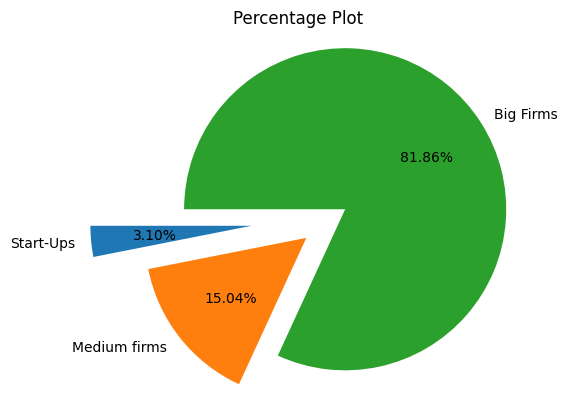

In [148]:
# Calculate the percentage of each variable
percentage1 = (a / total) * 100
percentage2 = (b / total) * 100
percentage3 = (c / total) * 100

# Create a pie chart
labels = ['Start-Ups', 'Medium firms', 'Big Firms']
sizes = [percentage1, percentage2, percentage3]
explode = [0.5, 0.2, 0.1]  # Optional: Explode a slice for emphasis

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=False, startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Add a title
plt.title('Percentage Plot')

# Display the plot
plt.show()